<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/LRU_Cache_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LRU Cache

Implement an `LRUCache` class for a Least Recently Used (LRU) cache. The class should support:

Inserting key-value pairs with the `insertKeyValuePair` method.
Retrieving a key's value with the `getValueFromKey` method.
Retrieving the most recently used (the most recently inserted or retrieved) key with the `getMostRecentKey` method.
Each of these methods should run in constant time.

Additionally, the `LRUCache` class should store a `maxSize` property set to the size of the cache, which is passed in as an argument during instantiation. This size represents the maximum number of key-value pairs that the cache can store at once. If a key-value pair is inserted in the cache when it has reached maximum capacity, the least recently used key-value pair should be evicted from the cache and no longer retrievable; the newly added key-value pair should effectively replace it.

Note that inserting a key-value pair with an already existing key should simply replace the key's value in the cache with the new value and shouldn't evict a key-value pair if the cache is full. Lastly, attempting to retrieve a value from a key that isn't in the cache should return `None` / `null`.



Sample Usage

```
// All operations below are performed sequentially.
LRUCache(3): - // instantiate an LRUCache of size 3
insertKeyValuePair("b", 2): -
insertKeyValuePair("a", 1): -
insertKeyValuePair("c", 3): -
getMostRecentKey(): "c" // "c" was the most recently inserted key
getValueFromKey("a"): 1
getMostRecentKey(): "a" // "a" was the most recently retrieved key
insertKeyValuePair("d", 4): - // the cache had 3 entries; the least recently used one is evicted
getValueFromKey("b"): None // "b" was evicted in the previous operation
insertKeyValuePair("a", 5): - // "a" already exists in the cache so its value just gets replaced
getValueFromKey("a"): 5
```



In [ ]:
# Do not edit the class below except for the insertKeyValuePair,
# getValueFromKey, and getMostRecentKey methods. Feel free
# to add new properties and methods to the class.
class LRUCache:
  def __init__(self, maxSize):
    self.cache = {}
    self.maxSize = maxSize or 1
    self.current_size = 0
    self.list_of_most_recent = DoublyLinkedList()

  # Time: O(1)
  # Space: O(1)
  # LRUCache class use O(n) space but individual method is O(1)
  def insertKeyValuePair(self, key, value):
    if key in self.cache:
      self.replace_key(key, value)
    else:
      if self.current_size == self.maxSize:
        self.evict_least_recent()
      else:
        self.current_size += 1
      self.cache[key] = DoublyLinkedListNode(key, value)
    self.update_most_recent(self.cache[key])
    
  def evict_least_recent(self):
    key_to_remove = self.list_of_most_recent.tail.key
    self.list_of_most_recent.remove_tail()
    del self.cache[key_to_remove]

  # Time: O(1)
  # Space: O(1)
  def getValueFromKey(self, key):
    if key not in self.cache:
      return None
    self.update_most_recent(self.cache[key])
    return self.cache[key].value

  # Time: O(1)
  # Space: O(1)
  def getMostRecentKey(self):
    return self.list_of_most_recent.head.key

  def replace_key(self, key, value):
    if key not in self.cache:
      raise Exception("The provided key isn't in the cache")
    self.cache[key].value = value
  
  def update_most_recent(self, node):
    self.list_of_most_recent.set_head_to(node)

class DoublyLinkedList:
  def __init__(self):
    self.head = None
    self.tail = None
  
  def set_head_to(self, node):
    if self.head == node:
      return
    elif self.head == None:
      self.head = node
      self.tail = node
    elif self.head == self.tail:
      self.tail.prev = node
      self.head = node
      self.head.next = self.tail
    else:
      if self.tail == node:
        self.remove_tail()
      node.remove_bindings()
      self.head.prev = node
      node.next = self.head
      self.head = node

  def remove_tail(self):
    if self.tail == None:
      return
    if self.tail == self.head:
      self.head = None
      self.tail = None
      return
    self.tail = self.tail.prev
    self.tail.next = None

class DoublyLinkedListNode:
  def __init__(self, key, value):
    self.key = key
    self.value = value
    self.prev = None
    self.next = None

  def remove_bindings(self):
    if self.prev != None:
      self.prev.next = self.next
    if self.next != None:
      self.next.prev = self.prev
    self.prev = None
    self.next = None

In [ ]:
LRU_cache = LRUCache(3)
LRU_cache.insertKeyValuePair('b', 2)
LRU_cache.insertKeyValuePair('a', 1)
LRU_cache.insertKeyValuePair('c', 3)

print("LRU_cache.getMostRecentKey()")
print(LRU_cache.getMostRecentKey())
print()

print("LRU_cache.getValueFromKey('a')")
print(LRU_cache.getValueFromKey('a'))
print()

LRU_cache.insertKeyValuePair('d', 4)
print("LRU_cache.getValueFromKey('b')")
print(LRU_cache.getValueFromKey('b'))
print()

LRU_cache.insertKeyValuePair('a', 5)
print("LRU_cache.getValueFromKey('a')")
print(LRU_cache.getValueFromKey('a'))

LRU_cache.getMostRecentKey()
c

LRU_cache.getValueFromKey('a')
1

LRU_cache.getValueFromKey('b')
None

LRU_cache.getValueFromKey('a')
5


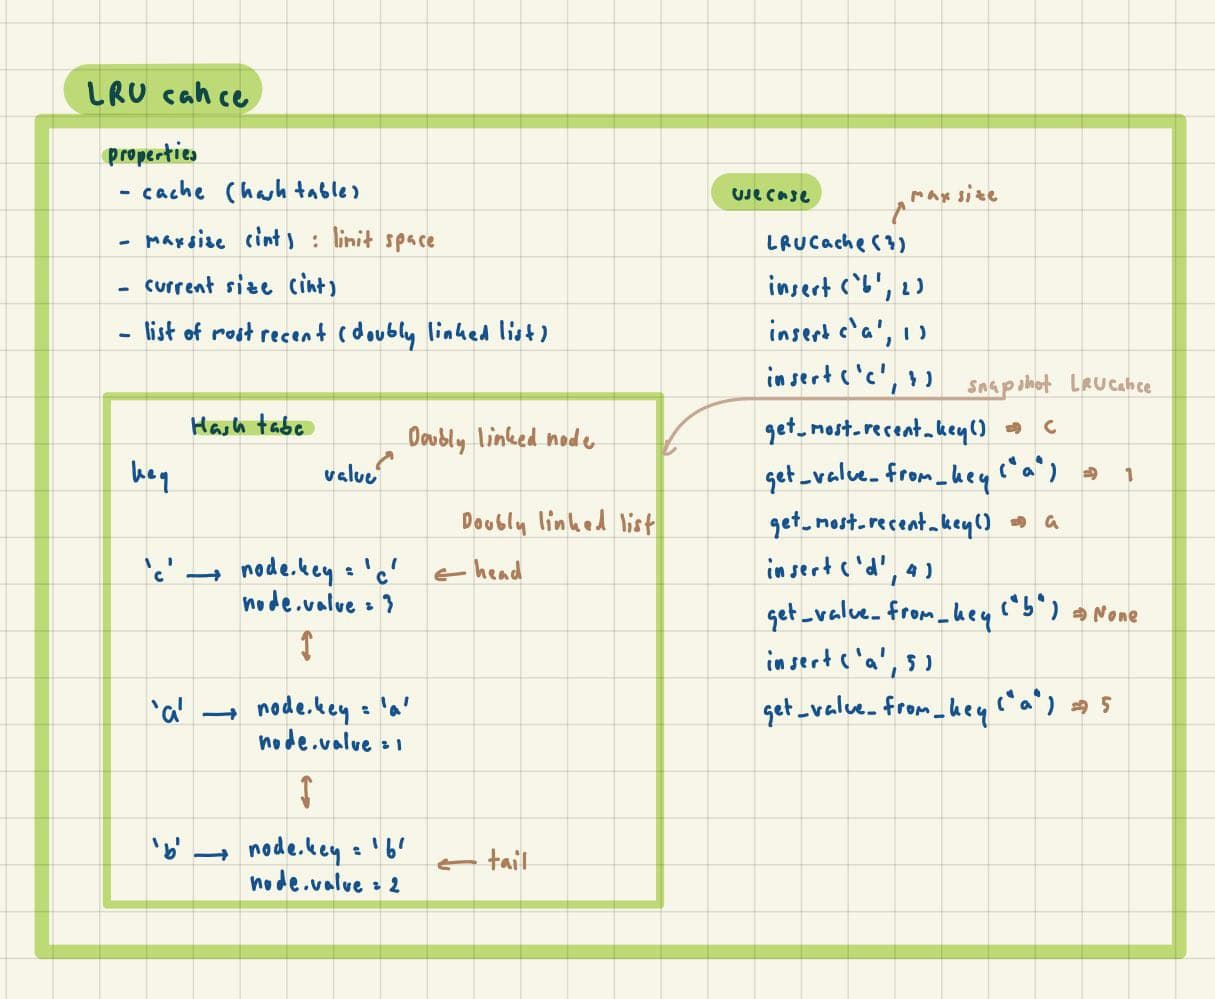